# Pryngles module: body 

In [1]:
from pryngles import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#@test:body
def test_fun(self):

    global B,C
    Verbose.VERBOSITY=VERB_ALL

    B=Body("Body",BODY_DEFAULTS,None,m=2,x=2,a=1,name_by_kind=True)

    print(B)
    print(B.m)

    B.update_body(name="B")
    print(B)

    C=Body("Body",BODY_DEFAULTS,B,name="C")
    print(C)
    print(B)

    #Tree structure
    C.show_tree()
    B.show_tree()
    
    #Test legacy
    B=Body("Body",BODY_DEFAULTS,None,name_by_kind=True,primary=C,orbit=dict(m=2,x=2,a=1))
    print(B.m)

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass
Test.test_fun=test_fun
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

.

      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
{'kind': 'Body', 'sg': None, 'name': 'Body', 'childs': {}, 'name_by_kind': True, 'source': None, 'm': 2, 'radius': 1, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 'q0': 0, 'nspangles': 1000, 'spangle_type': 0, 'shape': 'sphere', 'geometry_args': {}, 'seed': 0, 'preset': True, 'albedo_gray_spherical': 1, 'albedo_gray_normal': 1, 'tau_gray_optical': 0, 'primary': None, 'optics': {}, 'orbit': {}, 'physics': {}, 'x': 2, 'a': 1, 'elements': {'m': 2, 'x': 2, 'a': 1}, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00])}
2
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
{'kind': 'Body', 'sg': None, 'name': 'B', 'childs': {}, 'name_by_kind': True, 'source': None, 'm': 2, 'radius': 1, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 'q0': 0, 'nspangles': 1000, 'spangle_type': 0, 'shape': 'sphere', 'geometry_args': {}


----------------------------------------------------------------------
Ran 1 test in 0.204s

OK


      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_star_properties:: Updating properties of Star
      VERB3::limb_darkening:: Normalization of limb darkening function for cs = [], N = 3.141592653589793
{'kind': 'Star', 'sg': None, 'name': '8776776377179', 'childs': {}, 'name_by_kind': False, 'source': None, 'm': 1, 'radius': 0.1, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 'q0': 0, 'nspangles': 1000, 'spangle_type': 6, 'shape': 'sphere', 'geometry_args': {}, 'seed': 0, 'preset': True, 'albedo_gray_spherical': 1, 'albedo_gray_normal': 1, 'tau_gray_optical': 0, 'primary': None, 'optics': {}, 'orbit': {}, 'physics': {}, 'limb_coeffs': [], 'elements': {'m': 1}, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00]), 'norm_limb_darkening': 3.141592653589793}
      VERB3::update_star:: Updating star
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properti

,name,spangle_type,geometry,scale,n_equ,alpha_equ,w,q0,center_equ,x_equ,y_equ,z_equ,r_equ,q_equ,f_equ,ns_equ,center_ecl,x_ecl,y_ecl,z_ecl,wx_ecl,wy_ecl,ns_ecl,center_int,x_int,y_int,z_int,ns_int,rho_int,az_int,cosf_int,cos_int,azim_int,n_int,n_int_ecl,d_int,asp_int,z_cen_int,hidden_by_int,transit_over_int,string_int,center_obs,x_obs,y_obs,z_obs,ns_obs,rho_obs,az_obs,cosf_obs,cos_obs,azim_obs,n_obs,d_obs,asp_obs,z_cen_obs,hidden_by_obs,transit_over_obs,beta_loc,center_luz,x_luz,y_luz,z_luz,ns_luz,rho_luz,az_luz,cosf_luz,cos_luz,azim_luz,n_luz,d_luz,asp_luz,z_cen_luz,hidden_by_luz,transit_over_luz,azim_obs_luz,asp,dsp,scatterer,albedo_gray_normal,albedo_gray_spherical,tau_gray_optical,F,Q,U,V,P,emmitter,Teq,Tem,emmisivity,unset,hidden,source,visible,intersect,shadow,indirect,emit,above,illuminated,transmit,transit,occult
283,8776776377203,6,1,0.1,"[0.7071067811865476, 0.0, 0.7071067811865475]",0,6.283185,0,"[0, 0, 0]",0.017366,-0.017012,0.097000,0.1,5.508088,1.325231,"[0.17366274780164015, -0.17012128034429888, 0.9700000000000002]","[0, 0, 0]",0.080619,0.017366,0.056560,"[0.5529167721325072, 0.11910510557314885, -0.8246799481744286]","[-0.21058199388268456, 0.9775761984890963, 0.0]","[0.8061874887065428, 0.17366274780164015, 0.5655996667953597]","[0.0, 0.0, 0.0]",0.080619,0.017366,0.056560,"[0.8061874887065428, 0.17366274780164015, 0.5655996667953597]",0.082468,0.212170,0.565600,0.565600,3.141593,"[0, 0, 1]","[0.0, 0.0, 1.0]",inf,0.000436,-inf,,,,"[0.0, 0.0, 0.0]",0.080619,0.017366,0.05656,"[0.8061874887065428, 0.17366274780164015, 0.5655996667953597]",0.082468,0.21217,0.5656,0.5656,3.141593,"[0, 0, 1]",inf,0.000436,-inf,,,0,"[0.0, 0.0, 0.0]",0.080619,0.017366,0.05656,"[0.8061874887065428, 0.17366274780164015, 0.5655996667953597]",0.082468,0.21217,0.5656,0.5656,3.141593,"[0, 0, 1]",inf,0.000436,-inf,,,0.0,0.000436,0.02357,,1.0,1.0,0.0,0,0,0,0,0,,273.15,273.15,1,False,False,True,True,False,False,False,False,False,True,False,False,False
284,8776776377203,6,1,0.1,"[0.7071067811865476, 0.0, 0.7071067811865475]",0,6.283185,0,"[0, 0, 0]",-0.001161,0.021445,0.097667,0.1,1.624866,1.354349,"[-0.01160642023720628, 0.21444699399035494, 0.9766666666666668]","[0, 0, 0]",0.053897,-0.001161,0.084224,"[0.8420493269923155, -0.018133042041365968, -0.5390956535700457]","[0.021529426476257493, 0.9997682150356668, -0.0]","[0.5389706993032108, -0.01160642023720628, 0.8422445466145123]","[0.0, 0.0, 0.0]",0.053897,-0.001161,0.084224,"[0.5389706993032108, -0.01160642023720628, 0.8422445466145123]",0.053910,6.261654,0.842245,0.842245,3.141593,"[0, 0, 1]","[0.0, 0.0, 1.0]",inf,0.000436,-inf,,,,"[0.0, 0.0, 0.0]",0.053897,-0.001161,0.084224,"[0.5389706993032108, -0.01160642023720628, 0.8422445466145123]",0.05391,6.261654,0.842245,0.842245,3.141593,"[0, 0, 1]",inf,0.000436,-inf,,,0,"[0.0, 0.0, 0.0]",0.053897,-0.001161,0.084224,"[0.5389706993032108, -0.01160642023720628, 0.8422445466145123]",0.05391,6.261654,0.842245,0.842245,3.141593,"[0, 0, 1]",inf,0.000436,-inf,,,0.0,0.000436,0.02357,,1.0,1.0,0.0,0,0,0,0,0,,273.15,273.15,1,False,False,True,True,False,False,False,False,False,True,False,False,False
285,8776776377203,6,1,0.1,"[0.7071067811865476, 0.0, 0.7071067811865475]",0,6.283185,0,"[0, 0, 0]",-0.011539,-0.014050,0.098333,0.1,4.024829,1.387968,"[-0.11538747573594085, -0.14050368678025163, 0.9833333333333334]","[0, 0, 0]",0.079467,-0.011539,0.059597,"[0.5897856444976678, -0.08563760913796571, -0.8030062848107751]","[0.14369436194777904, 0.9896221149228733, -0.0]","[0.7946727778707984, -0.11538747573594085, 0.5959705584627452]","[0.0, 0.0, 0.0]",0.079467,-0.011539,0.059597,"[0.7946727778707984, -0.11538747573594085, 0.5959705584627452]",0.080301,6.138992,0.595971,0.595971,3.141593,"[0, 0, 1]","[0.0, 0.0, 1.0]",inf,0.000436,-inf,,,,"[0.0, 0.0, 0.0]",0.079467,-0.011539,0.059597,"[0.7946727778707984, -0.11538747573594085, 0.5959705584627452]",0.080301,6.138992,0.595971,0.595971,3.141593,"[0, 0, 1]",inf,0.000436,-inf,,,0,"[0.0, 0.0, 0.0]",0.079467,-0.011539,0.05

  VERB1::set_observer:: Setting observer
  VERB1::set_intersect:: Setting intersect using nvec = [0, 0, 1], alpha = 0 center = None, name = None
      VERB3::set_intersect:: Generating intersection matrices from pvec = [0, 0, 1]
      VERB3::rotation_matrix:: Rotation axis: [1 0 0] [0. 1. 0.] [0. 0. 1.]
  VERB1::set_luz:: Setting light-source
  VERB1::set_intersect:: Setting intersect using nvec = [0, 0, 1], alpha = 0 center = None, name = None
      VERB3::set_intersect:: Generating intersection matrices from pvec = [0, 0, 1]
      VERB3::rotation_matrix:: Rotation axis: [1 0 0] [0. 1. 0.] [0. 0. 1.]
  VERB1::set_luz:: Number of points: 288


<IPython.core.display.Javascript object>


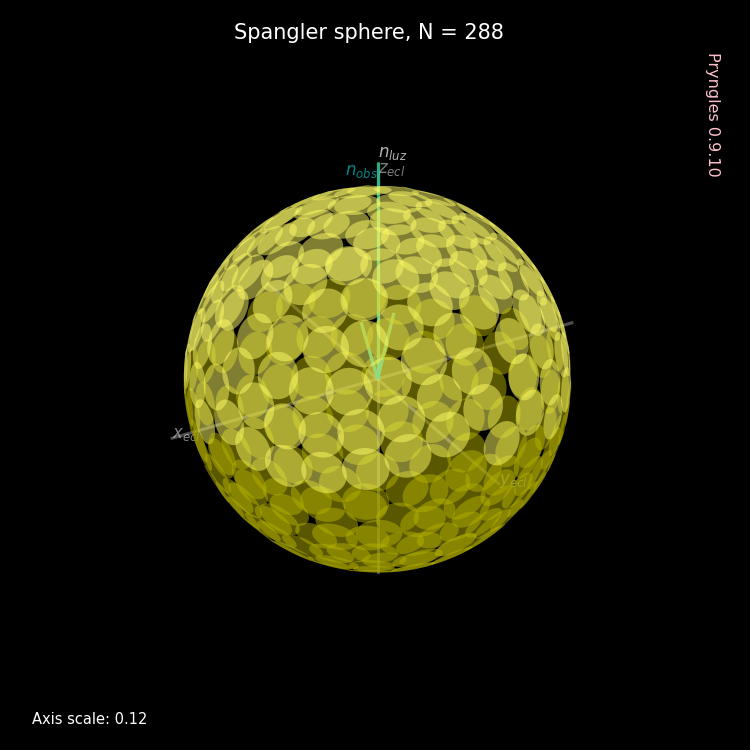

.
----------------------------------------------------------------------
Ran 1 test in 0.822s

OK


In [3]:
#@test:body
def test_star(self):

    global S
    Verbose.VERBOSITY=VERB_ALL

    S=Star()
    print(S)

    #Check derived properties
    self.assertEqual(np.isclose([S.wrot],
                                [2*np.pi/BODY_DEFAULTS["prot"]],
                                rtol=1e-7),
                     [True]*1)

    S.update_star(m=2,limb_coeffs=[1,1])
    print(S)

    #Check exception: parent could not be different from None or Body
    self.assertRaises(AssertionError,lambda:Star(parent="Nada"))     

    S=Star(nspangles=270,i=45*Consts.deg)
    S.spangle_body()

    print_df(S.sg.data.tail())

    S.sg.set_observer()
    S.sg.set_luz()
    S.sg.plot3d()

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_star=test_star
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_star_properties:: Updating properties of Star
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_childs:: Add child 8776757718282 to body Star (8776809831882)
      VERB3::_update_parent:: Add parent 8776809831882 to body Planet (8776757718282)
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::update_planet:: Updating Planet
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_planet_properties:: Updating Planet properties
8776757718282
      VERB3::update_planet:: Updating Planet
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_planet_properties:: Updating Planet properties
{'kind': 

,name,spangle_type,geometry,scale,n_equ,alpha_equ,w,q0,center_equ,x_equ,y_equ,z_equ,r_equ,q_equ,f_equ,ns_equ,center_ecl,x_ecl,y_ecl,z_ecl,wx_ecl,wy_ecl,ns_ecl,center_int,x_int,y_int,z_int,ns_int,rho_int,az_int,cosf_int,cos_int,azim_int,n_int,n_int_ecl,d_int,asp_int,z_cen_int,hidden_by_int,transit_over_int,string_int,center_obs,x_obs,y_obs,z_obs,ns_obs,rho_obs,az_obs,cosf_obs,cos_obs,azim_obs,n_obs,d_obs,asp_obs,z_cen_obs,hidden_by_obs,transit_over_obs,beta_loc,center_luz,x_luz,y_luz,z_luz,ns_luz,rho_luz,az_luz,cosf_luz,cos_luz,azim_luz,n_luz,d_luz,asp_luz,z_cen_luz,hidden_by_luz,transit_over_luz,azim_obs_luz,asp,dsp,scatterer,albedo_gray_normal,albedo_gray_spherical,tau_gray_optical,F,Q,U,V,P,emmitter,Teq,Tem,emmisivity,unset,hidden,source,visible,intersect,shadow,indirect,emit,above,illuminated,transmit,transit,occult
194,8776757718282,0,1,0.1,"[6.123233995736766e-17, 0.0, 1.0]",0,6.283185,0,"[0, 0, 0]",0.028080,-0.009552,0.0955,0.1,5.955305,1.269660,"[0.28080478278493565, -0.09551792483667675, 0.9550000000000001]","[0, 0, 0]",0.009552,0.028080,0.0955,"[0.3075449587526389, 0.9041244927253315, -0.29660579899927775]","[-0.946727217513436, 0.3220366060237056, 0.0]","[0.0955179248366768, 0.28080478278493565, 0.9550000000000001]","[0.0, 0.0, 0.0]",0.009552,0.028080,0.0955,"[0.0955179248366768, 0.28080478278493565, 0.9550000000000001]",0.029661,1.242916,0.955,0.955,3.141593,"[0, 0, 1]","[0.0, 0.0, 1.0]",inf,0.000631,-inf,,,,"[0.0, 0.0, 0.0]",0.009552,0.02808,0.0955,"[0.0955179248366768, 0.28080478278493565, 0.9550000000000001]",0.029661,1.242916,0.955,0.955,3.141593,"[0, 0, 1]",inf,0.000631,-inf,,,0,"[0.0, 0.0, 0.0]",0.009552,0.02808,0.0955,"[0.0955179248366768, 0.28080478278493565, 0.9550000000000001]",0.029661,1.242916,0.955,0.955,3.141593,"[0, 0, 1]",inf,0.000631,-inf,,,0.0,0.000631,0.028355,,1.0,1.0,0.0,0,0,0,0,0,,273.15,273.15,1,False,False,False,True,False,False,False,False,False,True,False,False,False
195,8776757718282,0,1,0.1,"[6.123233995736766e-17, 0.0, 1.0]",0,6.283185,0,"[0, 0, 0]",-0.012603,0.022998,0.0965,0.1,2.072083,1.305443,"[-0.12602538251072315, 0.22998391892266234, 0.9650000000000001]","[0, 0, 0]",-0.022998,-0.012603,0.0965,"[-0.8462710490104344, -0.46373517400212294, -0.26224988083886674]","[0.48055458445815846, -0.8769648176273931, 0.0]","[-0.2299839189226623, -0.12602538251072315, 0.9650000000000001]","[0.0, 0.0, 0.0]",-0.022998,-0.012603,0.0965,"[-0.2299839189226623, -0.12602538251072315, 0.9650000000000001]",0.026225,3.642880,0.965,0.965,3.141593,"[0, 0, 1]","[0.0, 0.0, 1.0]",inf,0.000631,-inf,,,,"[0.0, 0.0, 0.0]",-0.022998,-0.012603,0.0965,"[-0.2299839189226623, -0.12602538251072315, 0.9650000000000001]",0.026225,3.64288,0.965,0.965,3.141593,"[0, 0, 1]",inf,0.000631,-inf,,,0,"[0.0, 0.0, 0.0]",-0.022998,-0.012603,0.0965,"[-0.2299839189226623, -0.12602538251072315, 0.9650000000000001]",0.026225,3.64288,0.965,0.965,3.141593,"[0, 0, 1]",inf,0.000631,-inf,,,0.0,0.000631,0.028355,,1.0,1.0,0.0,0,0,0,0,0,,273.15,273.15,1,False,False,False,True,False,False,False,False,False,True,False,False,False
196,8776757718282,0,1,0.1,"[6.123233995736766e-17, 0.0, 1.0]",0,6.283185,0,"[0, 0, 0]",-0.005289,-0.021582,0.0975,0.1,4.472047,1.346721,"[-0.052892584597813236, -0.2158179197716515, 0.9750000000000001]","[0, 0, 0]",0.021582,-0.005289,0.0975,"[0.9469751083186244, -0.2320843472208531, -0.22220486043288937]","[0.23803522791882367, 0.9712565213524352, -0.0]","[0.21581791977165155, -0.052892584597813236, 0.9750000000000001]","[0.0, 0.0, 0.0]",0.021582,-0.005289,0.0975,"[0.21581791977165155, -0.052892584597813236, 0.9750000000000001]",0.022220,6.042843,0.975,0.975,3.141593,"[0, 0, 1]","[0.0, 0.0, 1.0]",inf,0.000631,-inf,,,,"[0.0, 0.0, 0.0]",0.021582,-0.005289,0.0975,"[0.21581791977165155, -0.052892584597813236, 0.9750000000000001]",0.02222,6.042843,0.975,0.975,3.141593,"[0, 0, 1]",inf,0.000631,-inf,,,0,"[0.0, 0.0, 0.0]",0.021582,-0.005289,0.0975,"[0.21581791977165155, -0.052892584597813236, 0.9750000000000001]",0.02222,6.042843,

<IPython.core.display.Javascript object>


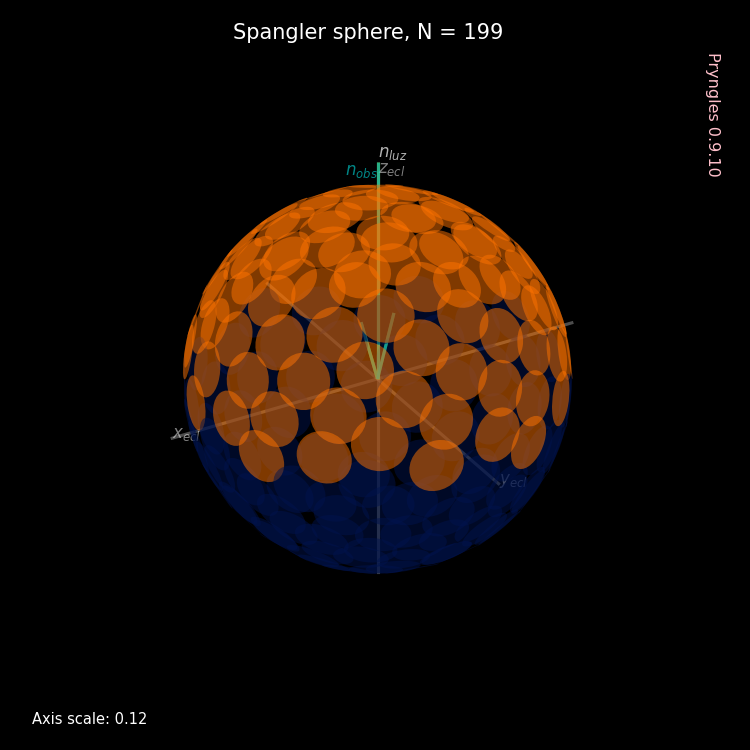

.
----------------------------------------------------------------------
Ran 1 test in 0.604s

OK


In [4]:
#@test:body
def test_planet(self):

    global P
    
    Verbose.VERBOSITY=VERB_ALL

    S=Star()

    #Check exception: parent is mandatory for planets
    self.assertRaises(ValueError,lambda:Planet())

    P=Planet(parent=S)
    print(P.name)

    #Check derived properties
    self.assertEqual(np.isclose([P.wrot],
                                [2*np.pi/BODY_DEFAULTS["prot"]],
                                rtol=1e-7),
                     [True]*1)

    #Check a non-existing property
    P.update_planet(vz=0.2)
    print(P)

    #Check exception: parent could not be different from None or Body
    self.assertRaises(AssertionError,lambda:Planet(parent="Nada"))

    P.update_body(nspangles=250)
    P.spangle_body()
    print_df(P.sg.data.tail())

    P.sg.plot3d()

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_planet=test_planet
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_star_properties:: Updating properties of Star
      VERB3::_update_childs:: Add child 8776809891825 to body Star (8776809891642)
      VERB3::_update_parent:: Add parent 8776809891642 to body Planet (8776809891825)
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::update_planet:: Updating Planet
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_planet_properties:: Updating Planet properties
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_childs:: Add child 8776809891696 to body Planet (8776809891825)
      VERB3::_update_parent:: Add parent 8776809891825 to body Ring (8776809891696)
      VERB3::update_body:: Updating Body
      VERB3::_update_properti

,name,spangle_type,geometry,scale,n_equ,alpha_equ,w,q0,center_equ,x_equ,y_equ,z_equ,r_equ,q_equ,f_equ,ns_equ,center_ecl,x_ecl,y_ecl,z_ecl,wx_ecl,wy_ecl,ns_ecl,center_int,x_int,y_int,z_int,ns_int,rho_int,az_int,cosf_int,cos_int,azim_int,n_int,n_int_ecl,d_int,asp_int,z_cen_int,hidden_by_int,transit_over_int,string_int,center_obs,x_obs,y_obs,z_obs,ns_obs,rho_obs,az_obs,cosf_obs,cos_obs,azim_obs,n_obs,d_obs,asp_obs,z_cen_obs,hidden_by_obs,transit_over_obs,beta_loc,center_luz,x_luz,y_luz,z_luz,ns_luz,rho_luz,az_luz,cosf_luz,cos_luz,azim_luz,n_luz,d_luz,asp_luz,z_cen_luz,hidden_by_luz,transit_over_luz,azim_obs_luz,asp,dsp,scatterer,albedo_gray_normal,albedo_gray_spherical,tau_gray_optical,F,Q,U,V,P,emmitter,Teq,Tem,emmisivity,unset,hidden,source,visible,intersect,shadow,indirect,emit,above,illuminated,transmit,transit,occult
249,8776809891696,4,0,0.3,"[0.8660254037844386, 0.0, 0.5]",0,6.283185,0,"[0, 0, 0]",0.075000,-1.299038e-01,0.0,0.15,5.235988,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",6.495191e-02,0.075000,-1.125000e-01,"[0.5, 0.0, -0.8660254037844386]","[0.0, 1.0, 0.0]","[0.8660254037844386, 0.0, 0.5]","[0.0, 0.0, 0.0]",6.495191e-02,0.075000,-1.125000e-01,"[0.8660254037844386, 0.0, 0.5]",0.099216,0.857072,-7.500000e-01,0.5,3.141593,"[0, 0, 1]","[0.0, 0.0, 1.0]",inf,0.000926,-inf,,,,"[0.0, 0.0, 0.0]",0.064952,0.075,-0.1125,"[0.8660254037844386, 0.0, 0.5]",0.099216,0.857072,-0.75,0.5,3.141593,"[0, 0, 1]",inf,0.000926,-inf,,,0,"[0.0, 0.0, 0.0]",0.064952,0.075,-0.1125,"[0.8660254037844386, 0.0, 0.5]",0.099216,0.857072,-0.75,0.5,3.141593,"[0, 0, 1]",inf,0.000926,-inf,,,0.0,0.000926,0.034337,,1.0,1.0,0.0,0,0,0,0,0,,273.15,273.15,1,False,True,False,False,False,False,False,False,False,False,False,False,False
250,8776809891696,4,0,0.3,"[0.8660254037844386, 0.0, 0.5]",0,6.283185,0,"[0, 0, 0]",0.106066,-1.060660e-01,0.0,0.15,5.497787,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",5.303301e-02,0.106066,-9.185587e-02,"[0.5, 0.0, -0.8660254037844386]","[0.0, 1.0, 0.0]","[0.8660254037844386, 0.0, 0.5]","[0.0, 0.0, 0.0]",5.303301e-02,0.106066,-9.185587e-02,"[0.8660254037844386, 0.0, 0.5]",0.118585,1.107149,-6.123724e-01,0.5,3.141593,"[0, 0, 1]","[0.0, 0.0, 1.0]",inf,0.000926,-inf,,,,"[0.0, 0.0, 0.0]",0.053033,0.106066,-0.091856,"[0.8660254037844386, 0.0, 0.5]",0.118585,1.107149,-0.612372,0.5,3.141593,"[0, 0, 1]",inf,0.000926,-inf,,,0,"[0.0, 0.0, 0.0]",0.053033,0.106066,-0.091856,"[0.8660254037844386, 0.0, 0.5]",0.118585,1.107149,-0.612372,0.5,3.141593,"[0, 0, 1]",inf,0.000926,-inf,,,0.0,0.000926,0.034337,,1.0,1.0,0.0,0,0,0,0,0,,273.15,273.15,1,False,True,False,False,False,False,False,False,False,False,False,False,False
251,8776809891696,4,0,0.3,"[0.8660254037844386, 0.0, 0.5]",0,6.283185,0,"[0, 0, 0]",0.129904,-7.500000e-02,0.0,0.15,5.759587,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",3.750000e-02,0.129904,-6.495191e-02,"[0.5, 0.0, -0.8660254037844386]","[0.0, 1.0, 0.0]","[0.8660254037844386, 0.0, 0.5]","[0.0, 0.0, 0.0]",3.750000e-02,0.129904,-6.495191e-02,"[0.8660254037844386, 0.0, 0.5]",0.135208,1.289761,-4.330127e-01,0.5,3.141593,"[0, 0, 1]","[0.0, 0.0, 1.0]",inf,0.000926,-inf,,,,"[0.0, 0.0, 0.0]",0.0375,0.129904,-0.064952,"[0.8660254037844386, 0.0, 0.5]",0.135208,1.289761,-0.433013,0.5,3.141593,"[0, 0, 1]",inf,0.000926,-inf,,,0,"[0.0, 0.0, 0.0]",0.0375,0.129904,-0.064952,"[0.8660254037844386, 0.0, 0.5]",0.135208,1.289761,-0.433013,0.5,3.141593,"[0, 0, 1]",inf,0.000926,-inf,,,0.0,0.000926,0.034337,,1.0,1.0,0.0,0,0,0,0,0,,273.15,273.15,1,False,True,False,False,False,False,False,False,False,False,False,False,False
252,8776809891696,4,0,0.3,"[0.8660254037844386, 0.0, 0.5]",0,6.283185,0,"[0, 0, 0]",0.144889,-3.882286e-02,0.0,0.15,6.021386,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1.941143e-02,0.144889,-3.362158e-02,"[0.5, 0.0, -0.8660254037844386]","[0.0, 1.0, 0.0]","[0.8660254037844386, 0.0, 0.5]","[0.0, 0.0, 0.0]",1.941143e-02,0.144889,-3.362158e-02,"[0.8660254037844386, 0.0, 0.5]",0.146183,1.437615,-2.241439e-01,0.5,3.141593,"[0, 0, 1]","[0.0, 0.0, 1.0]",inf,0.000926,-inf,,,,"[0.

<IPython.core.display.Javascript object>


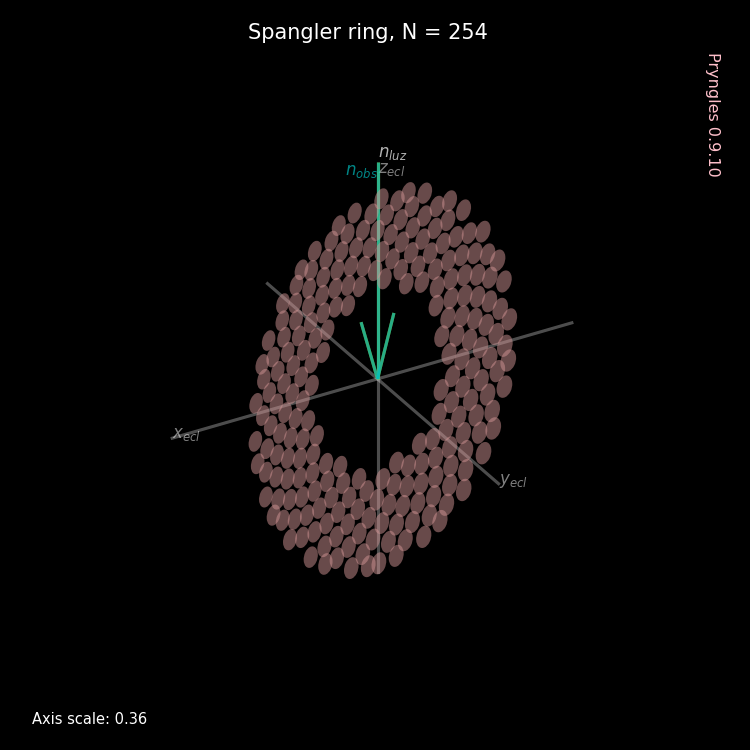

.
----------------------------------------------------------------------
Ran 1 test in 0.633s

OK


In [5]:
#@test:body
def test_ring(self):

    Verbose.VERBOSITY=VERB_ALL

    #Define first star and planet
    S=Star()
    P=Planet(parent=S)

    self.assertRaises(ValueError,lambda:Ring())
    R=Ring(parent=P)

    R.update_ring(fe=3)
    print(R)

    R.update_body(nspangles=250,i=60*Consts.deg,roll=0*Consts.deg)
    R.spangle_body()
    print_df(R.sg.data.tail())
    R.sg.plot3d()

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_ring=test_ring
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

### The end

In [34]:
#@end:module